In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from datetime import datetime


from data_read import load_data_into_dataframe

#enable IPython to display matplolib graphs
%matplotlib inline


ERROR! Session/line number was not unique in database. History logging moved to new session 118


In [3]:
    df = load_data_into_dataframe("daily")
    df.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000239,2011-12-02,0.1665,0.177571,0.500,28,0.099961,4.972,0.055
1,MAC000239,2011-12-03,0.1000,0.146417,0.632,48,0.119502,7.028,0.025
2,MAC000239,2011-12-04,0.0835,0.133646,0.685,48,0.120006,6.415,0.024
3,MAC000239,2011-12-05,0.0870,0.135646,0.685,48,0.123517,6.511,0.017
4,MAC000239,2011-12-06,0.1175,0.145708,0.778,48,0.139207,6.994,0.027


In [4]:
df.columns

Index(['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max',
       'energy_count', 'energy_std', 'energy_sum', 'energy_min'],
      dtype='object')

In [5]:
df.shape

(3510433, 9)

In [6]:
#A heat map of correlation may give us a understanding of which variables are important
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sbn.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sbn.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sbn.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sbn.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()



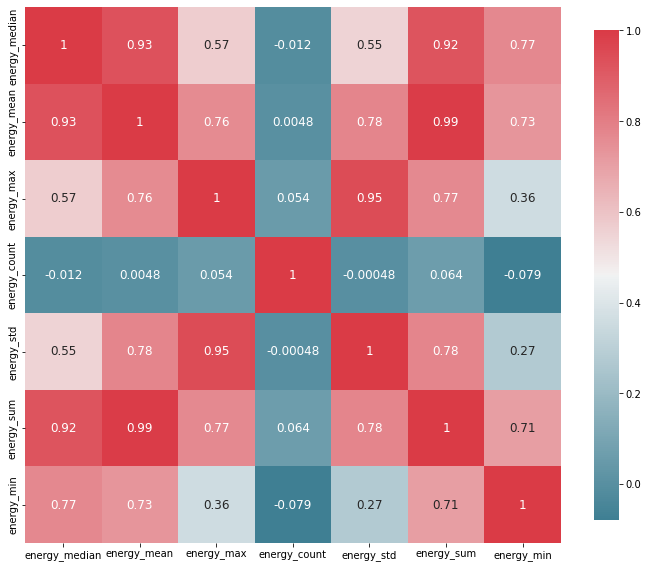

In [8]:
plot_correlation_map(df)

In [11]:
affluenthh_filt = df["LCLid"] == "MAC000002"

In [13]:
affluent_hh_data = df[affluenthh_filt]

ERROR! Session/line number was not unique in database. History logging moved to new session 127


In [14]:
affluent_hh_data.describe

<bound method NDFrame.describe of          LCLid         day  energy_median  energy_mean  energy_max  \
0    MAC000002  2012-10-12         0.1385     0.154304       0.886   
1    MAC000002  2012-10-13         0.1800     0.230979       0.933   
2    MAC000002  2012-10-14         0.1580     0.275479       1.085   
3    MAC000002  2012-10-15         0.1310     0.213688       1.164   
4    MAC000002  2012-10-16         0.1450     0.203521       0.991   
..         ...         ...            ...          ...         ...   
500  MAC000002  2014-02-24         0.1345     0.261000       0.891   
501  MAC000002  2014-02-25         0.1925     0.246375       0.802   
502  MAC000002  2014-02-26         0.1515     0.256833       1.028   
503  MAC000002  2014-02-27         0.2180     0.427458       1.350   
504  MAC000002  2014-02-28         1.3870     1.387000       1.387   

     energy_count  energy_std  energy_sum  energy_min  
0              46    0.196034       7.098       0.000  
1            

In [16]:
affluent_hh_data[["day", "energy_mean"]]

,day,energy_mean
0,2012-10-12,0.154304
1,2012-10-13,0.230979
2,2012-10-14,0.275479
3,2012-10-15,0.213688
4,2012-10-16,0.203521
...,...,...
500,2014-02-24,0.261000
501,2014-02-25,0.246375
502,2014-02-26,0.256833
503,2014-02-27,0.427458
